In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
def change_to_numeric(x):
    if x == 'Super built-up  Area':
        return 0
    elif x == 'Plot  Area':
        return 1
    elif x == 'Built-up  Area':
        return 2
    else:
        return 3

df['area_type_numeric'] = df['area_type'].apply(change_to_numeric)

In [8]:
df


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,area_type_numeric
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,2
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0


In [9]:
df2= df[['area_type_numeric','price']]
df2.corr()

,area_type_numeric,price
area_type_numeric,1.000000,0.092563
price,0.092563,1.000000


In [10]:
df.drop('area_type',axis='columns',inplace=True)
df

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_numeric
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0
...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,2
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0


In [11]:
df.balcony.median()


2.0

In [12]:
df.balcony.fillna(df.balcony.median(),inplace=True)

In [13]:
df.iloc[13316]

availability         Ready To Move
location             Richards Town
size                         4 BHK
society                        NaN
total_sqft                    3600
bath                           5.0
balcony                        2.0
price                        400.0
area_type_numeric                0
Name: 13316, dtype: object

In [14]:
df

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_numeric
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0
...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,2
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,2.0,400.00,0
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0


In [15]:
def ready(x):
    if x=='Ready To Move':
        return 1
    else:
        return 0
df['availability']= df['availability'].apply(ready)

In [16]:
df[['availability', 'price']].corr()

,availability,price
availability,1.000000,0.034483
price,0.034483,1.000000


In [17]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_numeric
0,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0
1,1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,1,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2
3,1,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0
4,1,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0


In [18]:
df2=df.drop(['society', 'availability', 'balcony'], axis=1)
df2.head()

,location,size,total_sqft,bath,price,area_type_numeric
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1
2,Uttarahalli,3 BHK,1440,2.0,62.00,2
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0
4,Kothanur,2 BHK,1200,2.0,51.00,0


In [19]:
df2.isnull().sum()

location              1
size                 16
total_sqft            0
bath                 73
price                 0
area_type_numeric     0
dtype: int64

In [20]:
df2.describe()

,bath,price,area_type_numeric
count,13247.000000,13320.000000,13320.000000
mean,2.692610,112.565627,0.534685
std,1.341458,148.971674,0.806907
min,1.000000,8.000000,0.000000
25%,2.000000,50.000000,0.000000
50%,2.000000,72.000000,0.000000
75%,3.000000,120.000000,1.000000
max,40.000000,3600.000000,3.000000


In [21]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
df2['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
16 BHK           1
12 Bedroom       1
13 BHK           1
14 BHK           1
18 Bedroom       1
19 BHK           1
27 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [23]:
df2['size'].fillna('2 BHK',inplace=True)

In [24]:
df2

,location,size,total_sqft,bath,price,area_type_numeric
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1
2,Uttarahalli,3 BHK,1440,2.0,62.00,2
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0
4,Kothanur,2 BHK,1200,2.0,51.00,0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,2
13316,Richards Town,4 BHK,3600,5.0,400.00,0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,0


In [25]:
df2.isnull().sum()

location              1
size                  0
total_sqft            0
bath                 73
price                 0
area_type_numeric     0
dtype: int64

In [26]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2

,location,size,total_sqft,bath,price,area_type_numeric,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,2,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0,3
4,Kothanur,2 BHK,1200,2.0,51.00,0,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,2,5
13316,Richards Town,4 BHK,3600,5.0,400.00,0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,0,4


In [27]:
df2[['BHK', 'price']].corr()

,BHK,price
BHK,1.000000,0.398074
price,0.398074,1.000000


In [28]:
df2['bath']=df2['bath'].fillna(df2.bath.median())
df2.head()

,location,size,total_sqft,bath,price,area_type_numeric,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,1,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,2,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0,3
4,Kothanur,2 BHK,1200,2.0,51.00,0,2


In [29]:
df2.location.value_counts()

Whitefield          540
Sarjapur  Road      399
Electronic City     302
Kanakpura Road      273
Thanisandra         234
                   ... 
Pillanna Gardens      1
 Basavangudi          1
kadubisnahalli        1
Rajagopala Nagar      1
Agara Village         1
Name: location, Length: 1305, dtype: int64

In [30]:
df2.location.fillna('Whitefield', inplace=True)

In [31]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [32]:
df2[df2.BHK > 20]

,location,size,total_sqft,bath,price,area_type_numeric,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,1,43


In [33]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,0,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,2,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,2,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,0,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,0,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,0,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,0,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,0,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,0,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,0,2


In [36]:
def convert(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+ float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [37]:
df3=df2.copy()
df3['total_sqft']= df3['total_sqft'].apply(convert)

In [38]:
df3.head()

,location,size,total_sqft,bath,price,area_type_numeric,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,1,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,2,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,0,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,0,2


In [39]:
df3.bath=df3.bath.apply(lambda x: int(x))

In [40]:
df3[['BHK', 'price']].corr()

,BHK,price
BHK,1.000000,0.398074
price,0.398074,1.000000


In [41]:
df4=df3.copy()
df4['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df4

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,1,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,2,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,0,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4,231.00,2,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5,400.00,0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4,488.00,0,4,10407.336319


In [42]:
df4.location.count()

13320

In [43]:
df4.location = df4.location.apply(lambda x:x.strip())
loc_stats=df4.groupby('location')['location'].count()
loc_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1294, dtype: int64

In [44]:
loc_stats.sort_values(ascending = False)


location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [45]:
len(loc_stats[loc_stats<=10])

1053

In [46]:
loc_stats_less_than_10= loc_stats[loc_stats<=10]

In [47]:
df4.location = df4.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [48]:
len(df4.location.unique())

242

<AxesSubplot:>

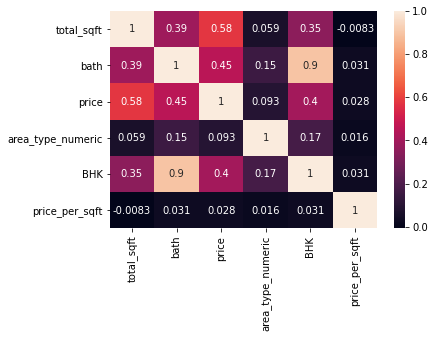

In [49]:
sns.heatmap(df4.corr(), annot= True)

In [50]:
df4.head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,1,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,2,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,0,2,4250.000000
5,Whitefield,2 BHK,1170.0,2,38.00,0,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4,204.00,0,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4,600.00,0,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3,63.25,0,3,4828.244275
9,other,6 Bedroom,1020.0,6,370.00,1,6,36274.509804


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='total_sqft'>

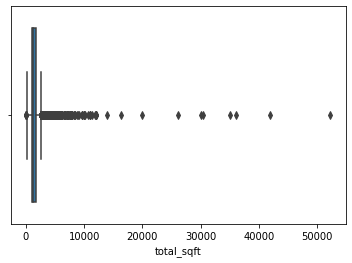

In [51]:
sns.boxplot('total_sqft', data=df4, orient = 'vertical')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='BHK'>

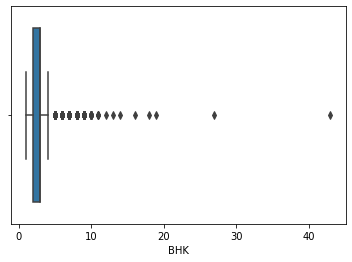

In [52]:
sns.boxplot('BHK', data=df4, orient='vertical')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='bath'>

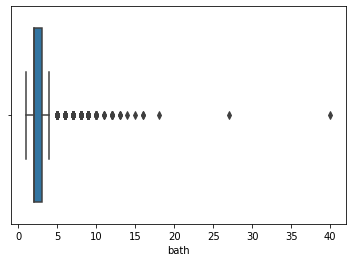

In [53]:
sns.boxplot('bath', data=df4, orient = 'vertical')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='price'>

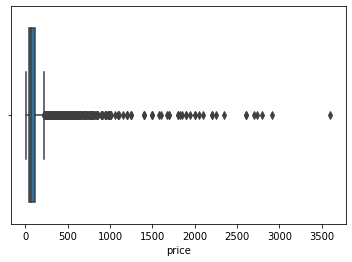

In [54]:
sns.boxplot('price', data=df4, orient = 'vertical')

In [55]:
max_threshold = df4[['bath', 'BHK', 'total_sqft', 'price', 'price_per_sqft']].quantile(0.95)
max_threshold

bath                  5.000000
BHK                   5.000000
total_sqft         3250.000000
price               324.000000
price_per_sqft    15293.303348
Name: 0.95, dtype: float64

In [56]:
df4=df4.drop(df4[df4['BHK']>5].index)
df4=df4.drop(df4[df4['bath']>5].index)
df4=df4.drop(df4[df4['total_sqft']>3250].index)
df4=df4.drop(df4[df4['price']>324].index)
df4=df4.drop(df4[df4['price_per_sqft']>15293].index)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='BHK'>

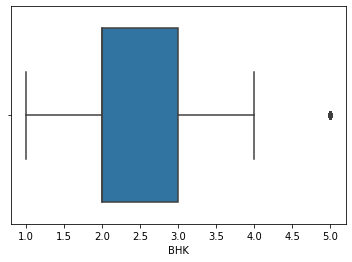

In [57]:
sns.boxplot('BHK', data=df4, orient = 'vertical')

In [58]:
df4.head()

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,1,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,2,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,0,2,4250.000000


In [59]:
df4[df4.total_sqft/df4.BHK < 300].head(10)

,location,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
78,Kaval Byrasandra,2 BHK,460.0,1,22.0,2,2,4782.608696
119,Hennur Road,2 Bedroom,276.0,3,23.0,1,2,8333.333333
176,Kumaraswami Layout,5 Bedroom,600.0,3,85.0,1,5,14166.666667
258,other,5 Bedroom,1200.0,5,170.0,1,5,14166.666667
315,other,5 Bedroom,1200.0,5,180.0,1,5,15000.000000
409,Sultan Palaya,2 Bedroom,550.0,1,62.0,1,2,11272.727273
482,Kenchenahalli,5 Bedroom,500.0,3,65.0,1,5,13000.000000
491,Banjara Layout,3 Bedroom,600.0,3,58.0,1,3,9666.666667
513,8th Phase JP Nagar,4 Bedroom,660.0,4,90.0,1,4,13636.363636
679,other,5 Bedroom,1200.0,5,100.0,1,5,8333.333333


In [60]:
df5 = df4[~(df4.total_sqft/df4.BHK < 300)]

In [61]:
df5['price_per_sqft'].describe()

count    11303.000000
mean      5576.658994
std       2114.608104
min        500.000000
25%       4135.179721
50%       5133.047210
75%       6491.605694
max      15090.909091
Name: price_per_sqft, dtype: float64

In [62]:
df5.groupby('location').count()

,size,total_sqft,bath,price,area_type_numeric,BHK,price_per_sqft
location,,,,,,,
1st Block Jayanagar,6,6,6,6,6,6,6
1st Phase JP Nagar,20,19,20,20,20,20,19
2nd Phase Judicial Layout,11,11,11,11,11,11,11
2nd Stage Nagarbhavi,3,3,3,3,3,3,3
5th Block Hbr Layout,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
Yelahanka,196,196,196,196,196,196,196
Yelahanka New Town,37,36,37,37,37,37,36
Yelenahalli,13,13,13,13,13,13,13


In [63]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [64]:
df6= remove_pps_outliers(df5)
df6.shape


(8413, 8)

In [65]:
df5.shape

(11342, 8)

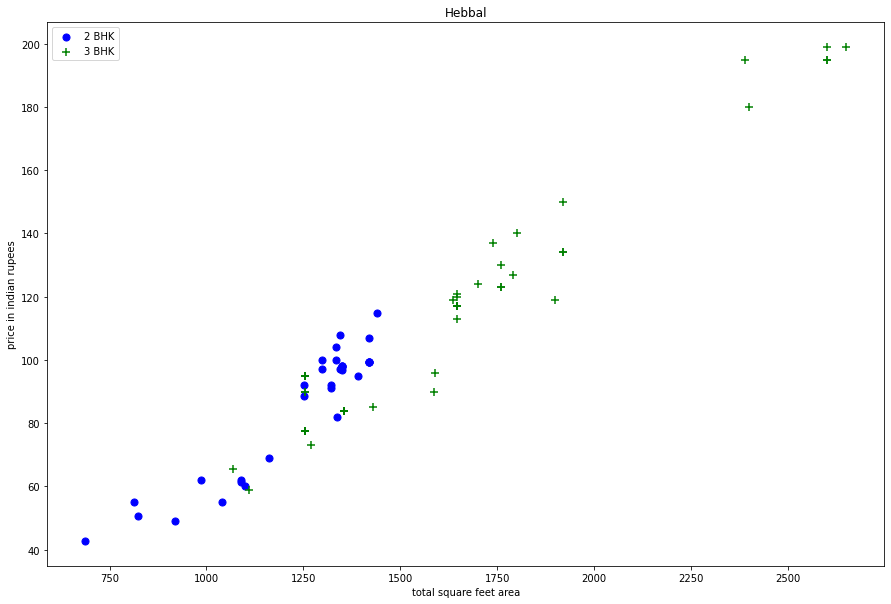

In [70]:
def scatter_plot(df, location):
    bhk2= df[(df.location == location) & (df.BHK == 2)]
    bhk3= df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' , color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('total square feet area')
    plt.ylabel('price in indian rupees')
    plt.title(location)
    plt.legend()

scatter_plot(df6, 'Hebbal')

In [68]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis='index')

df7= remove_bhk_outliers(df6)
df7.shape

(6088, 8)